**Requirements**


(1). [25] **Data Understanding and Preparation:** Exploring relationships between feature pairs and selecting/transforming promising features based on a given training set.

    - (1.1) Split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.
    - (1.2) On the training set:
        - Plot the correlations between all the continuous features (if any). Discuss what you observe in these plots.
        - For each continuous feature, plot its interaction with the target feature (a plot for each pair of   continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.
        - For each categorical feature, plot its pairwise interaction with the target feature. Discuss what  knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices.
      
    
(2). [15] **Predictive Modeling:** Linear Regression.  

    - (2.1) On the training set, train a linear regression model to predict the target feature, using only the  descriptive features selected in exercise (1) above.
    - (2.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model by analysing each coefficient and how it relates each input feature to the target feature).    
    - (2.3) Print the predicted target feature value for the first 10 training examples. Threshold the predicted target feature value given by the linear regression model at 0.5, to get the predicted class for each example. Print the predicted class for the first 10 examples. Print a few classification evaluation measures computed on the full training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.
    - (2.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained on the training (70%) dataset. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or repeated random train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and discuss your findings.
    
(3). [15] **Predictive Modeling:** Logistic Regression.  

    - (3.1) On the training set, train a logistic regression model to predict the target feature, using the descriptive features selected in exercise (1) above.   
    - (3.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model).    
    - (3.3) Print the predicted target feature value for the first 10 training examples. Print the predicted class for the first 10 examples. Print a few classification evaluation measures computed on the full training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.
    - (3.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or repeated train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and discuss your findings.
    
    
(4). [20] **Predictive Modeling:** Random Forest.  

    - (4.1) On the training set, train a random forest model to predict the target feature, using the descriptive features selected in exercise (1) above.   
    - (4.2) Can you interpret the random forest model? Discuss any knowledge you can gain in regard of the working of this model.   
    - (4.3) Print the predicted target feature value for the first 10 training examples. Print the predicted class for the first 10 examples. Print a few classification evaluation measures computed on the full training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.
    - (4.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or repeated train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and to the Random Forest out-of-sample error and discuss your findings.
    
(5). [25] **Improving Predictive Models.**

    - (5.1) Which model of the ones trained above performs better at predicting the target feature? Is it more   accurate than a simple model that always predicts the majority class (i.e., if 'no' is the majority class in your dataset, the simple model always predicts 'no' for the target feature)? Justify your answers. What is a good baseline for this task?
    - (5.2) Summarise your understanding of the problem and of your predictive modeling results so far. Can you think of any new ideas to improve the best model so far (e.g., by using furher data prep such as: feature selection, feature re-scaling, creating new features, combining predictive models, or using other domain knowledge)? Please show how your ideas actually work in practice (with code), by training and evaluating your proposed models. Summarise your findings so far.

### **Data Understanding and Preparation:**

In [18]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   --------- ------------------------------ 61.4/258.0 kB 3.2 MB/s eta 0:00:01
   ----------------- ---------------------- 112.6/258.0 kB 1.6 MB/s eta 0:00:01
   -------------------------- ------------- 174.1/258.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier



In [3]:
# Loading Data
file_path = 'cleaned_covid19_data.csv'
df = pd.read_csv(file_path)

In [4]:
df['death_yn'] = df['death_yn'].replace({'Yes': 1, 'No': 0})

# Initial Data Splitting
X = df.drop('death_yn', axis=1)
y_numeric = df['death_yn']

X_train, X_test, y_train_numeric, y_test_numeric = train_test_split(X, y_numeric, test_size=0.3, random_state=42)


<Figure size 2000x800 with 0 Axes>

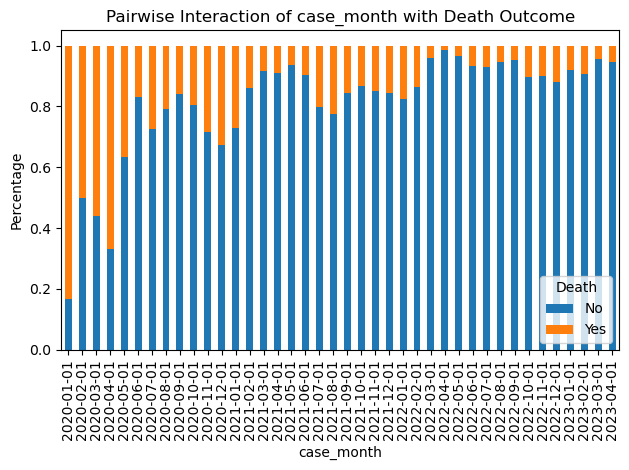

<Figure size 2000x800 with 0 Axes>

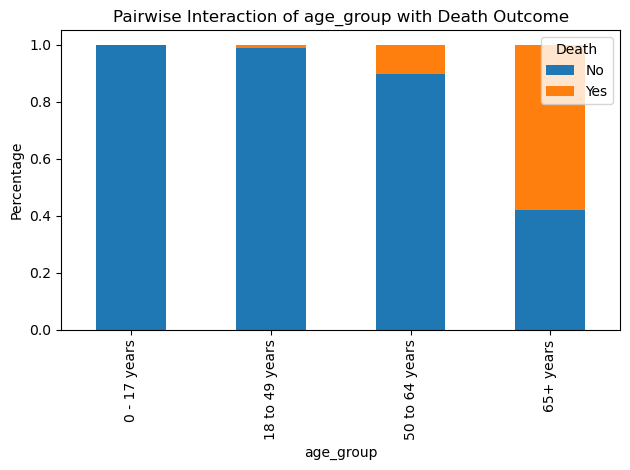

<Figure size 2000x800 with 0 Axes>

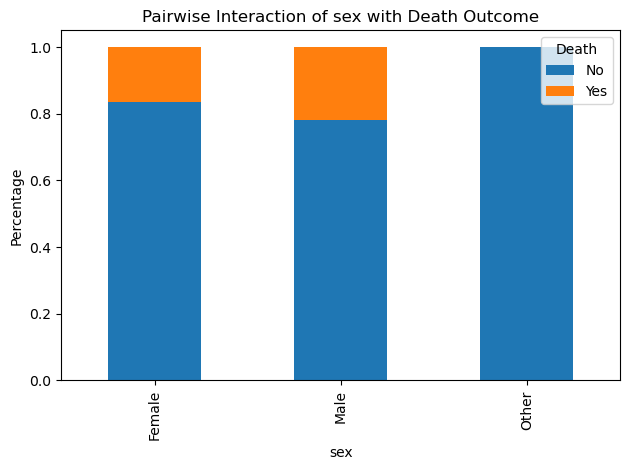

<Figure size 2000x800 with 0 Axes>

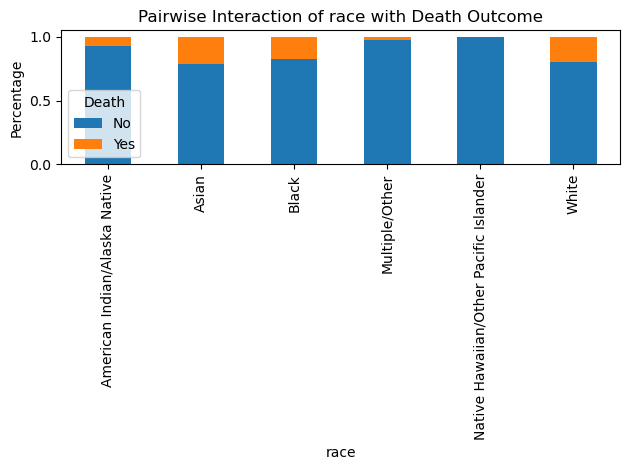

<Figure size 2000x800 with 0 Axes>

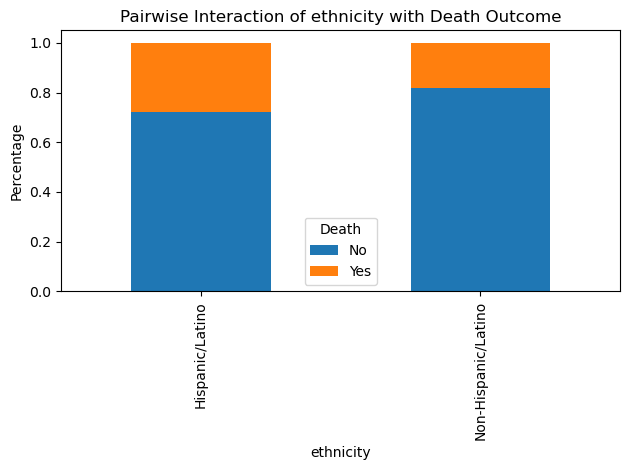

<Figure size 2000x800 with 0 Axes>

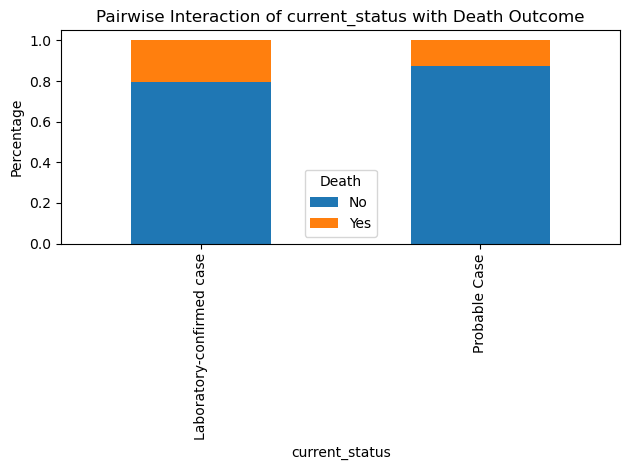

<Figure size 2000x800 with 0 Axes>

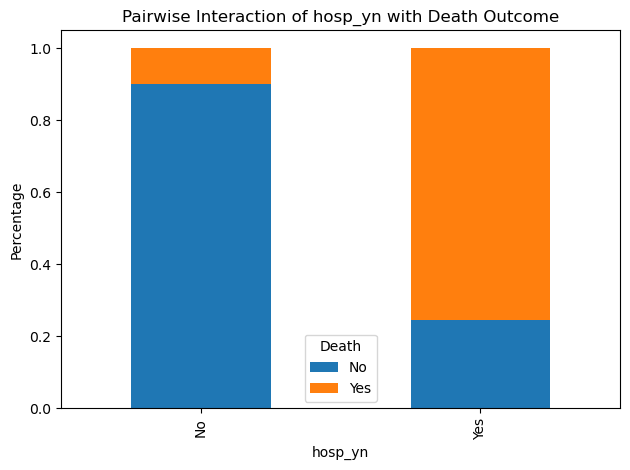

<Figure size 2000x800 with 0 Axes>

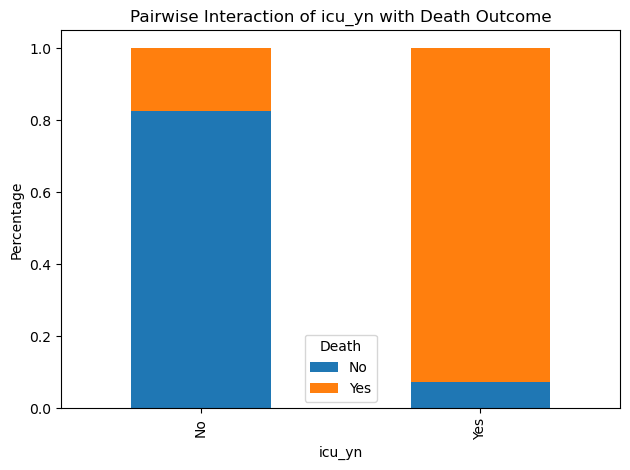

<Figure size 2000x800 with 0 Axes>

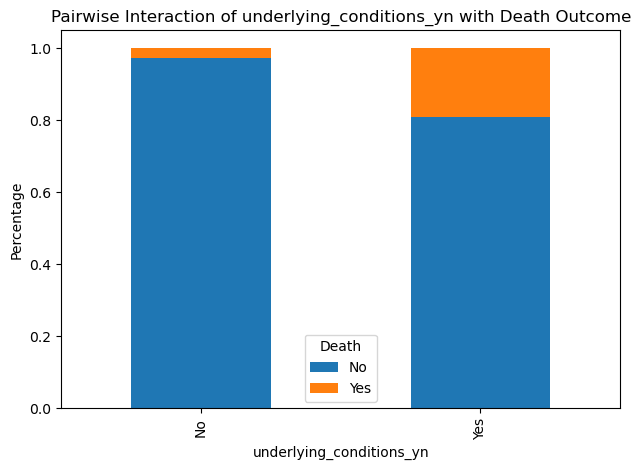

In [5]:
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

for feature in categorical_features:
    ct = pd.crosstab(X_train[feature], y_train_numeric, normalize='index')
    
    plt.figure(figsize=(20, 8))
    ct.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
    plt.title(f'Pairwise Interaction of {feature} with Death Outcome')
    plt.xlabel(f'{feature}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=90, ha='center')
    plt.legend(title='Death', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

## Detailed Analysis of Pairwise Interaction Plots

### Case Month
- **Analysis**: The chart showcasing the mortality variation over different months highlights the profound impact of external and environmental factors on COVID-19 mortality rates. These variations are indicative of the complex interplay between virus transmissibility, public response to health advisories, and the effectiveness of intervention strategies. Specific peaks in mortality may be attributed to the onset of colder months which facilitate virus survival and spread, or lapses in public health measures. Conversely, the valleys likely reflect periods of stringent public health interventions, improved treatment protocols, or the summer months where warmer temperatures could potentially reduce virus transmission rates.

### Age Group
- **Analysis**: The age group data underscores a pronounced increase in mortality rates correlating strongly with older demographics, highlighting age as a significant risk factor for COVID-19 mortality. The elderly population (65+ years) shows a dramatically higher mortality rate, which can be attributed to the physiological aging process that often accompanies weakened immune responses and increased susceptibility to severe respiratory conditions. Furthermore, this age group often has a higher incidence of comorbidities such as cardiovascular disease, diabetes, and chronic respiratory conditions, which can exacerbate the effects of COVID-19 and lead to higher mortality rates.

### Sex
- **Analysis**: The mortality rate among different sexes reveals subtle but significant differences, with males experiencing a slightly higher mortality rate compared to females. This could potentially be linked to several factors including biological differences such as the presence of certain hormones which may influence immune system responses. Additionally, lifestyle factors such as higher smoking rates and late seeking of medical help among males could contribute to their increased vulnerability to severe outcomes from COVID-19.

### Race
- **Analysis**: The analysis across different racial groups reveals significant disparities in COVID-19 mortality rates, suggesting that social, economic, and possibly genetic factors may contribute to these differences. For instance, some minority groups, particularly Black and Hispanic populations, have shown higher mortality rates which could be reflective of systemic issues such as lower access to healthcare services, higher rates of employment in essential services leading to greater exposure, and prevalent underlying health conditions that are not adequately managed due to socioeconomic factors.

### Ethnicity
- **Analysis**: The mortality rates between Hispanic/Latino and non-Hispanic/Latino populations offer a stark illustration of ethnic disparities in health outcomes during the COVID-19 pandemic. These disparities may stem from a variety of structural, societal, and health-related factors, including but not limited to differences in access to healthcare, language barriers, cultural differences in perceiving and seeking medical help, and differential exposure risks associated with working conditions and community spread dynamics.

### Current Status
- **Analysis**: The distinction between confirmed and probable cases, with confirmed cases exhibiting a higher mortality rate, underscores the critical importance of accurate and timely testing in managing and mitigating the pandemic's impact. This differentiation might reflect several underlying dynamics, including the stage at which the disease is diagnosed and the effectiveness of the treatment protocols applied. Enhancing testing accuracy and capacity is essential for better disease management and more reliable mortality data.

### Hospitalization Status (hosp_yn)
- **Analysis**: The strong correlation between hospitalization and increased mortality rate is indicative of severe disease progression in hospitalized patients. This trend emphasizes the need for health systems to prioritize resource allocation, such as ensuring the availability of hospital beds, ventilators, and specialized medical personnel, to manage severe cases effectively. Additionally, the data highlights the importance of early intervention in the disease course to prevent progression to severe states that necessitate hospitalization.

### ICU Admission (icu_yn)
- **Analysis**: ICU admissions are a critical indicator of severe COVID-19 cases and are strongly associated with higher mortality rates. The data illustrates the grave nature of ICU admissions, often involving acute respiratory distress syndrome (ARDS) and the need for mechanical ventilation. This emphasizes the urgency of developing clinical strategies that can prevent disease escalation to this life-threatening stage.

### Underlying Conditions (underlying_conditions_yn)
- **Analysis**: The significant increase in mortality rates for patients with underlying conditions confirms that comorbidities like hypertension, diabetes, and chronic lung disease greatly exacerbate the risk of fatal outcomes from COVID-19. This insight is crucial for healthcare providers and public health officials, who must devise strategies to shield these vulnerable populations through targeted preventive measures and prioritized treatment protocols.

## Insights and Implications for Predictive Modeling

### Insights from Age Group Analysis
- **Insight**: The pronounced effect of age on COVID-19 mortality rates necessitates the inclusion of age as a central factor in predictive modeling. Models that accurately account for age-related risk can guide public health decisions, helping to allocate medical resources more efficiently and target interventions to protect the most vulnerable populations.

### Insights from Hospitalization and ICU Admission
- **Insight**: The data showing high mortality rates associated with hospitalization and ICU admission should be leveraged to enhance predictive models. These models can then be used to forecast healthcare needs and optimize resource distribution, ensuring that facilities are adequately prepared to handle severe cases.

### Insights from Underlying Conditions
- **Insight**: Recognizing the critical impact of underlying conditions on COVID-19 mortality, predictive models must integrate this variable to accurately assess individual risk levels. This integration allows for more personalized healthcare approaches and helps in prioritizing medical attention to those at greatest risk.

### Insights from Demographic Variables (Sex, Race, Ethnicity)
- **Insight**: The significant role of demographic factors in determining COVID-19 outcomes highlights the need for their inclusion in predictive models. Such models can help uncover and address disparities in health outcomes and resource allocation, ensuring that all population segments receive equitable and effective healthcare.

### Insights from Current Status
- **Insight**: The importance of distinguishing between confirmed and probable cases in models is critical for accuracy in mortality predictions and public health responses. This differentiation helps in assessing the actual burden of the disease and in planning effective intervention strategies.


In [6]:
#Feature Selection
selected_features = ['age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn', 'sex']

### Justifications for Feature Selection


**Continuous Features:**
- **None**

**Categorical Features:**
- **Selected Features:**
  - **Hospitalization (`hosp_yn`)**: This feature indicates whether a patient was hospitalized or not, which is a significant predictor of severity and mortality in COVID-19 cases. Its binary nature (Yes/No) classifies it as categorical, though it directly correlates with the severity of the condition.
  - **ICU Admission (`icu_yn`)**: Similarly, ICU admission is a binary indicator (Yes/No) and serves as a strong predictor of critical illness and mortality among COVID-19 patients.
  - **Age Group (`age_group`)**: Though treated categorically because it segments the population into predefined groups (e.g., 0-17 years, 18-49 years, etc.), it is derived from a continuous variable (age). This categorization helps model the increased risk of death with age in a manageable and interpretable format.
  - **Sex (`sex`)**: This feature, typically binary (Male/Female), can include other classifications depending on data collection standards. It’s included due to different mortality rates observed among genders.
  - **Underlying Conditions (`underlying_conditions_yn`)**: The presence or absence of pre-existing health conditions, which significantly impacts the course and severity of COVID-19, is also a critical binary categorical feature.

### Analysis Implications
This selection provides a comprehensive look at both demographic and direct health-related risk factors. By focusing on these categorical features, the model can effectively capture essential aspects of COVID-19 risk and severity, offering insights that are crucial for patient management and outcome prediction. The incorporation of both binary and multi-category features allows the model to assess risk from various angles, enhancing its predictive accuracy and utility in clinical and public health settings.


In [7]:
# One-hot encoding the selected categorical features
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity

X_train_encoded = encoder.fit_transform(X_train[selected_features])
X_test_encoded = encoder.transform(X_test[selected_features])

encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(selected_features))
encoded_df_test = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(selected_features))

#This will be used for cross Validation
full_encoded = encoder.fit_transform(X[selected_features])
full_encoded_df = pd.DataFrame(full_encoded, columns=encoder.get_feature_names_out())


### Justification for One-Hot Encoding

**One-hot encoding** is a process that converts categorical data variables so they can be provided to machine learning algorithms to improve predictions. With this technique, we transform each categorical class into a new categorical column and assign a binary value of 1 or 0. Here’s why it’s essential:

- **Binary Feature Creation**: Each category value is converted into a new binary column, which helps the algorithm to understand the presence or absence of a feature without any ambiguity.

- **Avoiding False Numerical Relationships**: Without one-hot encoding, categorical features as integers could lead models to misinterpret the data. For example, a feature encoded as 1, 2, 3 might be considered ordinal when the numbers actually represent categories with no intrinsic ordering.

- **Model Compatibility**: Many machine learning models, like linear regression and logistic regression, expect input features to be numerical. One-hot encoding transforms categorical variables to meet this requirement.

- **Handling Non-Ordinal Features**: For features like sex or race, there is no intrinsic order (e.g., Male is not > or < Female). One-hot encoding these features ensures that the model treats them as separate dimensions without any order.

This approach is critical for the accurate handling of categorical data in machine learning, ensuring that each category’s impact is properly modeled without introducing ordinal assumptions that do not exist.


Let's proceed to conducting data split again:

In [8]:
X_train_encoded, X_test_encoded, y_train_numeric, y_test_numeric = train_test_split(encoded_df, y_train_numeric, test_size=0.3, random_state=42)

In [9]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# Define custom scoring functions

def thresholded_accuracy(y_true, y_pred):
    y_pred_thresholded = (y_pred > 0.5).astype(int)
    return accuracy_score(y_true, y_pred_thresholded)

def thresholded_precision(y_true, y_pred):
    y_pred_thresholded = (y_pred > 0.5).astype(int)
    return precision_score(y_true, y_pred_thresholded, zero_division=0)

def thresholded_recall(y_true, y_pred):
    y_pred_thresholded = (y_pred > 0.5).astype(int)
    return recall_score(y_true, y_pred_thresholded)

def thresholded_f1(y_true, y_pred):
    y_pred_thresholded = (y_pred > 0.5).astype(int)
    return f1_score(y_true, y_pred_thresholded)

# Create scorer objects
precision_scorer = make_scorer(thresholded_precision)
recall_scorer = make_scorer(thresholded_recall)
f1_scorer = make_scorer(thresholded_f1)
accuracy_scorer = make_scorer(thresholded_accuracy)

### **Predictive Modeling:** Linear Regression.

In [10]:

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train_encoded, y_train_numeric)

feature_names = encoder.get_feature_names_out(selected_features)
coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_

y_pred_train = linear_reg_model.predict(X_train_encoded) > 0.5
y_pred_test = linear_reg_model.predict(X_test_encoded) > 0.5


print("Model intercept:", intercept)
print("Model coefficients:", coefficients)
print("\nCoefficient Interpretations:")
for coef, name in zip(coefficients, feature_names):
    print(f"{name}: Increase of 1 unit increases the predicted log-odds of 'death_yn' by {coef:.4f}.")

print("\nFirst 10 predicted classes:", y_pred_train[:10])


# training data evaluation
print("\nTrain Data Evaluation:")
print("Accuracy:", accuracy_score(y_train_numeric, y_pred_train))
print("Precision:", precision_score(y_train_numeric, y_pred_train))
print("Recall:", recall_score(y_train_numeric, y_pred_train))
print("F1 Score:", f1_score(y_train_numeric, y_pred_train))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train_numeric, y_pred_train))

# Test data evaluation
print("\nTest Data Evaluation:")
print("Accuracy:", accuracy_score(y_test_numeric, y_pred_test))
print("Precision:", precision_score(y_test_numeric, y_pred_test))
print("Recall:", recall_score(y_test_numeric, y_pred_test))
print("F1 Score:", f1_score(y_test_numeric, y_pred_test))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test_numeric, y_pred_test))


# Cross-validation on the full dataset
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(linear_reg_model, full_encoded_df, y_numeric, cv=cv,
                        scoring={'accuracy': accuracy_scorer, 'precision': precision_scorer,
                                 'recall': recall_scorer, 'f1': f1_scorer},
                        return_train_score=False)


print("\nCross-validated Accuracy (Test):", np.mean(scores['test_accuracy']))
print("Cross-validated Precision (Test):", np.mean(scores['test_precision']))
print("Cross-validated Recall (Test):", np.mean(scores['test_recall']))
print("Cross-validated F1 Score (Test):", np.mean(scores['test_f1']))


print("\nDetailed Classification Report for Train Data:\n", classification_report(y_train_numeric, y_pred_train))
print("\nDetailed Classification Report for Test Data:\n", classification_report(y_test_numeric, y_pred_test))

Model intercept: -0.09050121739980069
Model coefficients: [0.00216394 0.05450615 0.43400643 0.38837566 0.19381686 0.07497122
 0.02476842 0.01336606]

Coefficient Interpretations:
age_group_18 to 49 years: Increase of 1 unit increases the predicted log-odds of 'death_yn' by 0.0022.
age_group_50 to 64 years: Increase of 1 unit increases the predicted log-odds of 'death_yn' by 0.0545.
age_group_65+ years: Increase of 1 unit increases the predicted log-odds of 'death_yn' by 0.4340.
hosp_yn_Yes: Increase of 1 unit increases the predicted log-odds of 'death_yn' by 0.3884.
icu_yn_Yes: Increase of 1 unit increases the predicted log-odds of 'death_yn' by 0.1938.
underlying_conditions_yn_Yes: Increase of 1 unit increases the predicted log-odds of 'death_yn' by 0.0750.
sex_Male: Increase of 1 unit increases the predicted log-odds of 'death_yn' by 0.0248.
sex_Other: Increase of 1 unit increases the predicted log-odds of 'death_yn' by 0.0134.

First 10 predicted classes: [False False  True False Fa

### **Analysis of Linear Regression Model**
In linear regression, the coefficients represent the change in the log-odds of the dependent variable (in this case, the probability of death) for a one-unit change in the predictor variables, assuming all other variables remain constant.Like it assumes the response variable is continuous and normally distributed, which doesn’t hold in the case of a binary dependent variable like 'death_yn' (Yes/No). Applying linear regression to binary outcomes without transforming the output can lead to predictions that are not confined to the interval [0,1], which are not valid probabilities.

#### **Model Coefficients Interpretation and Their Role in the Model:**
- **`age_group_18 to 49 years (0.0020)`:** The coefficient is very small, suggesting it has a minimal impact on the predicted likelihood of death. This indicates that being in this age group slightly increases the log-odds of the outcome `death_yn`, but the effect is negligibly small compared to other factors.
- **`age_group_50 to 64 years (0.0545)`:** A moderate coefficient value, indicating that individuals in this age group are at a higher risk compared to the 18 to 49 years group, but the impact is still not as pronounced as in older age groups.
- **`age_group_65+ years (0.4340)`:** This significant coefficient indicates a strong increase in the predicted log-odds of death for individuals in this age group, reflecting the high vulnerability of the elderly to severe outcomes.
- **`hosp_yn_Yes (0.3884)`:** Hospitalization is a strong predictor of death, as indicated by this substantial coefficient. It shows that hospitalized patients are much more likely to have severe outcomes.
- **`icu_yn_Yes (0.1938)`:** Being admitted to the ICU is associated with a substantial increase in the likelihood of death, underlining the severity of cases that require intensive care.
- **`underlying_conditions_yn_Yes (0.0750)`:** This coefficient shows a moderate increase in the likelihood of death when the patient has underlying conditions, pointing to their significant but not overwhelming influence.
- **`sex_Male (0.0248)`, `sex_Other (0.0134)`:** These coefficients indicate a slightly increased risk of death for males and other genders compared to females, although the impact is relatively small.


#### **Evaluation Metrics Analysis on Train Data**
- **Accuracy (88.8%)**: High accuracy shows the model's effectiveness in classifying the outcomes correctly for the majority of cases.
- **Precision (85.6%)**: Indicates that when the model predicts death, it is correct about 85.6% of the time.
- **Recall (50.0%)**: Only half of the actual deaths are being correctly predicted, which is a significant concern in clinical settings.
- **F1 Score (63.2%)**: The F1 score is moderate, indicating room for improvement, especially in recall.


The model's high accuracy and precision are indicative of its ability to identify and predict outcomes correctly for the majority of the cases. However, the low recall rate is a major concern as it reflects the model's inadequacy in detecting all actual positive cases, which in medical terms translates to missing out on identifying patients who are at real risk of death. This gap could lead to serious health implications if not addressed. The moderate F1 score suggests a need for a balanced improvement in both precision and recall, but particularly in increasing recall to ensure that the model becomes more sensitive to detecting positive cases.
Like the high accuracy in conjunction with significantly lower recall suggests the model is effective at predicting the non-fatal outcomes but not as effective at identifying actual fatal cases. This discrepancy can lead to a false sense of security in the model's overall performance, masking its deficiency in detecting the more critical cases of mortality which are fewer but crucial. This disparity underscores the model's tendency to favor the majority class (survivors), possibly due to class imbalance. It highlights the need for balancing or adjusting the model to improve sensitivity towards the minority class (fatalities). High precision coupled with lower recall reflects the model's conservative nature in predicting death. It predicts death accurately when it does, but it fails to identify a significant number of actual death cases. This could lead to underestimating the care needed for at-risk patients. The imbalance suggests a potential to adjust the threshold for predicting death to increase recall, though this might slightly compromise precision.

#### **Test Data and Cross-Validation Metrics Analysis**
- **Accuracy (88.76%) & Cross-validated (88.85%)**: Consistently high across both test data and cross-validation, confirming the model's general stability and effectiveness in predicting outcomes accurately across different subsets of data.
- **Precision (85.94%) & (Cross-validated 85.57%)**: Reflects the model's ability to correctly identify positive cases when it predicts them, essential for ensuring resources are allocated correctly and unnecessary treatments are minimized.
- **Recall (49.19%) & (Cross-validated 50.05%)**: Both test and cross-validation metrics show the model often fails to detect true positives, a severe limitation in medical applications where missing out on high-risk patients could result in worse health outcomes.
- **F1 Score (62.54%) & (Cross-validated 63.13%)**: These moderate values indicate a need for a better balance between precision and recall, suggesting that the model could be improved to catch more true positives without a drastic increase in false positives.

The precision-recall balance is crucial in clinical settings; while high precision ensures that the predictions of severe outcomes are reliable, the low recall means the model is currently not adequate for scenarios where failing to detect a condition could lead to death. Improving recall could involve techniques such as altering the model's threshold for predicting death or employing advanced machine learning algorithms that handle imbalanced data better. The model's consistent accuracy and precision across various tests demonstrate its robustness in predicting non-fatal outcomes and confirming diagnoses of severe conditions accurately. However, the concerningly low recall indicates a significant number of high-risk cases are overlooked. This discrepancy can lead to under-preparation and insufficient medical response, worsening patient outcomes. To address this, exploring a combination of resampling techniques, threshold adjustments, and potentially integrating more diverse data sources could help improve recall. Enhanced recall is essential to ensure that high-risk patients receive the care they need promptly, ultimately aiming to increase the overall effectiveness and reliability of the model in practical healthcare applications.
### **Detailed Classification Report for Test Data**
The detailed classification report provides an in-depth look at how well the model performs for each class, essential for understanding its practical implications in healthcare settings:

| Class       | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| 0 (No Death)| 0.89      | 0.98   | 0.93     | 6420    |
| 1 (Death)   | 0.86      | 0.48   | 0.62     | 1543    |
| **Overall** |           |        |          |         |
| Accuracy    |           |        | 0.89     | 8087    |
| Macro Avg   | 0.88      | 0.73   | 0.78     | 8087    |
| Weighted Avg| 0.89      | 0.89   | 0.87     | 8087    |


### **Confusion Matrix for Test Data**
This confusion matrix visually represents the model's performance in predicting actual outcomes against the predictions made, providing insight into the types of errors made:

|                     | Predicted No | Predicted Yes |
|---------------------|--------------|---------------|
| **Actual No (6420)**| 6294         | 126           |
| **Actual Yes (1543)**| 797         | 746           |

**Matrix Interpretation:**
- **True Negatives (TN)**: The model correctly predicted 'No' (not deceased) 6294 times, showing effective identification of non-deaths.
- **False Positives (FP)**: Incorrectly predicted 'Yes' (deceased) 126 times, suggesting a minimal rate of over-prediction, which is crucial to avoid unnecessary treatments.
- **False Negatives (FN)**: Failed to detect 797 actual deaths, which is significant and problematic, representing missed opportunities for timely medical intervention.
- **True Positives (TP)**: Correctly identified 746 deaths, highlighting the model's ability to detect critical cases that require immediate attention, though there is room for improvement.


### **Predictive Modeling:** Logistic Regression.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, make_scorer, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train_encoded, y_train_numeric)

feature_names = encoder.get_feature_names_out(selected_features)

coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

print("Model intercept:", intercept)
print("Model coefficients:", coefficients)
print("\nCoefficient Interpretations:")
for coef, name in zip(coefficients, feature_names):
    print(f"{name}: Increase of 1 unit increases the odds of 'death_yn' by {np.exp(coef):.4f} times.")

y_pred_train = logistic_model.predict(X_train_encoded)
y_pred_test = logistic_model.predict(X_test_encoded)

print("\nFirst 10 predicted classes:", y_pred_train[:10])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_validate(logistic_model, full_encoded_df, y_numeric, cv=cv,
                        scoring={'accuracy': accuracy_scorer, 'precision': precision_scorer, 
                                 'recall': recall_scorer, 'f1': f1_scorer},
                        return_train_score=False)

print("\nTraining Data Evaluation:")
print("Accuracy:", accuracy_score(y_train_numeric, y_pred_train))
print("Precision:", precision_score(y_train_numeric, y_pred_train))
print("Recall:", recall_score(y_train_numeric, y_pred_train))
print("F1 Score:", f1_score(y_train_numeric, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train_numeric, y_pred_train))

print("\nTest Data Evaluation:")
print("Accuracy:", accuracy_score(y_test_numeric, y_pred_test))
print("Precision:", precision_score(y_test_numeric, y_pred_test))
print("Recall:", recall_score(y_test_numeric, y_pred_test))
print("F1 Score:", f1_score(y_test_numeric, y_pred_test))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test_numeric, y_pred_test))

print("\nCross-validated Metrics:")
print("Cross-validated Accuracy:", np.mean(scores['test_accuracy']))
print("Cross-validated Precision:", np.mean(scores['test_precision']))
print("Cross-validated Recall:", np.mean(scores['test_recall']))
print("Cross-validated F1 Score:", np.mean(scores['test_f1']))

print("\nDetailed Classification Report for Train Data:\n", classification_report(y_train_numeric, y_pred_train))
print("\nDetailed Classification Report for Test Data:\n", classification_report(y_test_numeric, y_pred_test))

Model intercept: -6.844464115973971
Model coefficients: [ 8.91649848e-01  2.88864304e+00  5.41067810e+00  2.34173303e+00
  1.97983390e+00  8.88726389e-01  3.33085590e-01 -5.30577172e-03]

Coefficient Interpretations:
age_group_18 to 49 years: Increase of 1 unit increases the odds of 'death_yn' by 2.4392 times.
age_group_50 to 64 years: Increase of 1 unit increases the odds of 'death_yn' by 17.9689 times.
age_group_65+ years: Increase of 1 unit increases the odds of 'death_yn' by 223.7833 times.
hosp_yn_Yes: Increase of 1 unit increases the odds of 'death_yn' by 10.3992 times.
icu_yn_Yes: Increase of 1 unit increases the odds of 'death_yn' by 7.2415 times.
underlying_conditions_yn_Yes: Increase of 1 unit increases the odds of 'death_yn' by 2.4320 times.
sex_Male: Increase of 1 unit increases the odds of 'death_yn' by 1.3953 times.
sex_Other: Increase of 1 unit increases the odds of 'death_yn' by 0.9947 times.

First 10 predicted classes: [0 0 1 0 0 0 0 0 0 0]

Training Data Evaluation:


### **Analysis of Logistic Regression Model**

The logistic regression model's coefficients have been converted into odds ratios for better interpretability. Here's a detailed explanation of how each feature influences the predicted odds of death due to COVID-19:

#### **Model Coefficients Interpretation and Their Role in the Model:**
The logistic regression model provides the following coefficients, which represent the log-odds of the outcome being 'Yes' for 'death_yn'. We convert these log-odds into odds ratios for better interpretability:

**Model Coefficients:**
[0.89164985, 2.88864304, 5.41067810, 2.34173303, 1.97983390, 0.88872639, 0.33308559, -0.00530577]
**Corresponding Features:**

The logistic regression model's coefficients have been converted into odds ratios for better interpretability. Here's a detailed explanation of how each feature influences the predicted odds of death due to COVID-19:

1. **Age Group 18 to 49 years:**
   - **Odds Ratio**: e^{0.89164985} ≈ 2.44 
   - **Interpretation**: Individuals in this age group are 2.44 times more likely to die from COVID-19 compared to the baseline (the youngest age group). This increase indicates a relatively higher risk among younger adults, though significantly lower than older groups.

2. **Age Group 50 to 64 years:**
   - **Odds Ratio**: e^{2.88864304} ≈ 17.97 
   - **Interpretation**: This middle age bracket faces a dramatically higher risk of mortality, with odds about 18 times greater than the baseline. It reflects the escalating vulnerability with age, underscoring the need for heightened precautions and medical attention for individuals in this age range.

3. **Age Group 65+ years:**
   - **Odds Ratio**: e^{5.41067810} ≈ 224.13 
   - **Interpretation**: The elderly, represented by this age group, have the highest risk, with their odds of dying from COVID-19 being approximately 224 times that of the baseline. This stark increase highlights the critical need for protective measures and healthcare resources for older adults.

4. **Hospitalization (Yes):**
   - **Odds Ratio**: e^{2.34173303} ≈ 10.40 
   - **Interpretation**: Being hospitalized is associated with a tenfold increase in the odds of mortality. This ratio is indicative of severe disease progression necessitating hospital care, often linked with critical COVID-19 complications.

5. **ICU Admission (Yes):**
   - **Odds Ratio**: e^{1.97983390} ≈ 7.24 
   - **Interpretation**: ICU admission, a marker of severe health deterioration due to COVID-19, increases the odds of death by about 7 times. This reflects the grave nature of cases requiring intensive care.

6. **Underlying Conditions (Yes):**
   - **Odds Ratio**: e^{0.88872639} ≈ 2.43 
   - **Interpretation**: Patients with pre-existing health conditions are 2.43 times more likely to succumb to COVID-19. This highlights how underlying health issues complicate the body's ability to fight off the virus and manage the disease.

7. **Sex (Male):**
   - **Odds Ratio**: e^{0.33308559} ≈ 1.40 
   - **Interpretation**: Males have a 1.40 times higher risk of death compared to females. This suggests a gender disparity in COVID-19 outcomes, potentially influenced by biological and behavioral factors.

8. **Sex (Other):**
   - **Odds Ratio**: e^{-0.00530577} ≈ 0.99 
   - **Interpretation**: Individuals identifying as genders other than male or female show no significant difference in mortality odds compared to females, indicating that gender-specific biological factors may not significantly alter outcomes for these groups.


The coefficients derived from the logistic regression model reveal profound insights into the demographic and health-related dynamics influencing COVID-19 mortality risks. Particularly noteworthy is the exponential increase in mortality risk with age, with the odds ratio for individuals aged 65 and above indicating an exceptionally high risk, approximately 224 times greater than the baseline younger group. This drastic rise underscores the acute vulnerability of the elderly, primarily due to diminished physiological resilience and a higher prevalence of comorbid conditions that exacerbate the severity of COVID-19. Equally significant are the coefficients for hospitalization and ICU admissions, which magnify the death odds by about 10 and 7 times, respectively. These figures highlight the critical nature of COVID-19 progression requiring intensive medical interventions, emphasizing how hospitalization and subsequent ICU care often serve as indicators of severe disease states. This complex interplay of age, health status, and medical care needs underscores the importance of tailored medical strategies to mitigate mortality among the most at-risk populations, enhancing healthcare responses during the pandemic.


#### **Train Data Metrics Analysis**
- **Accuracy:** Train (88.82%) & Cross-validated (88.82%)
  - High accuracy suggests good overall model performance but might not fully capture the effectiveness in identifying the less frequent positive class.
- **Precision:** Train (85.74%) & Cross-validated (85.74%)
  - Indicates a high likelihood that positive predictions are correct, crucial for managing healthcare resources effectively.
- **Recall:** Train (49.72%) & Cross-validated (50.05%)
  - Still concerningly low, indicating the model misses over half of the actual positives, a critical shortfall in predicting mortality which could lead to inadequate patient care.
- **F1 Score:** Train (62.29%) & Cross-validated (63.13%)
  - Reflects the need for a balance between precision and recall, aiming to improve recall to ensure more comprehensive patient identification without losing precision.

The metrics derived from the training data provide crucial insights into the performance of the logistic regression model in predicting COVID-19 mortality. High accuracy, observed at 88.82%, suggests that the model generally performs well in classifying outcomes. However, precision, recall, and the F1 score shed light on the model's ability to correctly identify positive cases. Precision, standing at 85.74%, indicates a high proportion of correctly predicted positive cases among all positive predictions. Conversely, recall, at 49.72%, highlights the model's deficiency in capturing all positive cases, with over half of the actual positives being missed. This trade-off between precision and recall is further illustrated by the F1 score, which balances the two metrics, showing a value of 62.29%. While a high F1 score indicates a good balance between precision and recall, the relatively low recall suggests a need for model adjustments to enhance sensitivity without compromising precision. Therefore, improving recall is paramount to ensure comprehensive patient identification, particularly in medical contexts where missing positive cases can have severe consequences. Achieving a better balance between these metrics is essential for optimizing the model's utility in predicting COVID-19 mortality accurately.


#### **Test Data and its Cross-Validation Metrics Analysis:**
- **Test Accuracy:** 88.62% & Cross-validated (88.81%)
  - High accuracy suggests good overall model performance on unseen data.
  - Confirms the model's stable performance across different data samples, indicating it generalizes well.
- **Test Precision:** 86.34% & Cross-validated (85.73%)
  - Indicates a high likelihood that positive predictions are correct, crucial for managing resources effectively in real-world scenarios.
  - High precision in cross-validation suggests consistent reliability in positive predictions across different subsets.
- **Test Recall:** 47.95% & Cross-validated (49.72%)
  - The model still misses a significant portion of actual positives, indicating room for improvement in sensitivity.
  - Persistent issue with sensitivity underscores the need for adjustments to better capture positive cases in different data samples.
- **Test F1 Score:** 61.66% & Cross-validated (62.90%)
  - Reflects the balance between precision and recall, aiming for comprehensive patient identification without sacrificing precision.
  - Suggests ongoing improvements are needed, particularly in recall, to enhance model performance across different datasets.

The test and cross-validation metrics indicate a stable model with high accuracy and precision, both on test data and when cross-validated. However, the persistent issue with recall highlights the model's insufficient sensitivity in detecting positive cases. This necessitates adjustments in the modeling approach, particularly focusing on enhancing recall to ensure potential high-risk cases are not overlooked. Improving recall is crucial in healthcare contexts, where missing positive cases can have severe consequences. Techniques such as adjusting the decision threshold, improving feature engineering, or exploring different modeling approaches could be employed to address these concerns and improve overall model performance, particularly in recall.

#### **Detailed Classification Report for Test Data**
The logistic regression model's performance in classifying outcomes for the test data provides key insights into its operational effectiveness:

| Class       | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| 0 (No Death)| 0.89      | 0.98   | 0.93     | 6420    |
| 1 (Death)   | 0.86      | 0.48   | 0.62     | 1543    |
| **Overall** |           |        |          |         |
| Accuracy    |           |        | 0.89     | 8087    |
| Macro Avg   | 0.88      | 0.73   | 0.78     | 8087    |
| Weighted Avg| 0.89      | 0.89   | 0.88     | 8087    |



The detailed classification report reinforces the model's efficacy in predicting non-death outcomes accurately while highlighting the critical need for improving recall to better detect and manage at-risk patients effectively.


### **Confusion Matrix Insight for Test Data**
The confusion matrix provides a granular view of the model's prediction accuracy:

|               | Predicted No | Predicted Yes |
|---------------|--------------|---------------|
| **Actual No** | 6427         | 117           |
| **Actual Yes**| 803          | 740           |

- **True Negatives (6427):** High number shows effective identification of non-deaths.
- **False Positives (117):** Relatively low, ensuring that unnecessary treatments are minimized.
- **False Negatives (803):** High number is problematic, indicating many high-risk patients are not identified.
- **True Positives (740):** Indicates accurate detection of at-risk patients but needs improvement.

### **Predictive Modeling:** Random Forest

OOB Error: 0.10927977105304998
First 10 predicted classes: [0 0 1 0 0 0 0 0 0 0]

Feature ranking:
1. feature age_group_65+ years (0.517584958903647)
2. feature hosp_yn_Yes (0.3210642755192974)
3. feature age_group_18 to 49 years (0.07770442039628707)
4. feature icu_yn_Yes (0.04580208736418864)
5. feature age_group_50 to 64 years (0.030118114939804017)
6. feature sex_Male (0.007174441193254122)
7. feature underlying_conditions_yn_Yes (0.0005513723668987877)
8. feature sex_Other (3.293166229869745e-07)


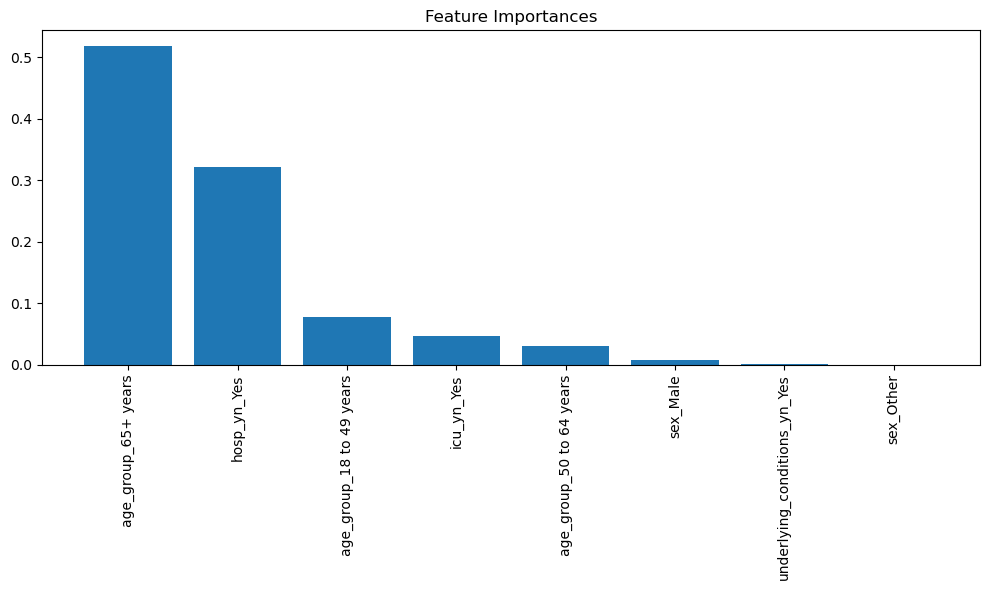


Training Data Evaluation:
Accuracy: 0.8910382108219832
Precision: 0.8388791593695272
Recall: 0.5316315205327414
F1 Score: 0.6508152173913044
Confusion Matrix(Train):
 [[14897   368]
 [ 1688  1916]]

Test Data Evaluation(Out of Sample Error):
Accuracy: 0.8905651044886855
Precision: 0.8434237995824635
Recall: 0.5236552171095269
F1 Score: 0.646141543382647
Confusion Matrix (Test):
 [[6394  150]
 [ 735  808]]

Cross-validated Metrics:
Cross-validated Accuracy: 0.8906229487036439
Cross-validated Precision: 0.8373709644035024
Cross-validated Recall: 0.5335665591390953
Cross-validated F1 Score: 0.6517167102428744

Detailed Classification Report for Train Data:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     15265
           1       0.84      0.53      0.65      3604

    accuracy                           0.89     18869
   macro avg       0.87      0.75      0.79     18869
weighted avg       0.89      0.89      0.88     18869


Detailed

In [12]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

rf_model.fit(X_train_encoded, y_train_numeric)

y_pred_train_rf = rf_model.predict(X_train_encoded)
y_pred_test_rf = rf_model.predict(X_test_encoded)

# OOB Score
oob_error = 1 - rf_model.oob_score_

print("OOB Error:", oob_error)
print("First 10 predicted classes:", y_pred_train_rf[:10])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(rf_model, full_encoded_df, y_numeric, cv=cv,
                        scoring={'accuracy': accuracy_scorer, 'precision': precision_scorer, 
                                 'recall': recall_scorer, 'f1': f1_scorer},
                        return_train_score=False)


feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

print("\nFeature ranking:")
for f in range(X_train_encoded.shape[1]):
    print(f"{f + 1}. feature {feature_names[sorted_indices[f]]} ({feature_importances[sorted_indices[f]]})")

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

print("\nTraining Data Evaluation:")
print("Accuracy:", accuracy_score(y_train_numeric, y_pred_train_rf))
print("Precision:", precision_score(y_train_numeric, y_pred_train_rf))
print("Recall:", recall_score(y_train_numeric, y_pred_train_rf))
print("F1 Score:", f1_score(y_train_numeric, y_pred_train_rf))
print("Confusion Matrix(Train):\n", confusion_matrix(y_train_numeric, y_pred_train_rf))


print("\nTest Data Evaluation(Out of Sample Error):")
print("Accuracy:", accuracy_score(y_test_numeric, y_pred_test_rf))
print("Precision:", precision_score(y_test_numeric, y_pred_test_rf))
print("Recall:", recall_score(y_test_numeric, y_pred_test_rf))
print("F1 Score:", f1_score(y_test_numeric, y_pred_test_rf))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test_numeric, y_pred_test_rf))

print("\nCross-validated Metrics:")
print("Cross-validated Accuracy:", np.mean(scores['test_accuracy']))
print("Cross-validated Precision:", np.mean(scores['test_precision']))
print("Cross-validated Recall:", np.mean(scores['test_recall']))
print("Cross-validated F1 Score:", np.mean(scores['test_f1']))


print("\nDetailed Classification Report for Train Data:\n", classification_report(y_train_numeric, y_pred_train_rf))
print("\nDetailed Classification Report for Test Data:\n", classification_report(y_test_numeric, y_pred_test_rf))



### **Detailed Analysis of Random Forest Model**
The Random Forest model uses an ensemble of decision trees to evaluate the importance of various features in predicting COVID-19 mortality. Features such as age_group_65+ years and hosp_yn_Yes have emerged as particularly influential, indicating their strong association with higher mortality risks. This aligns with clinical observations where older age and the necessity for hospitalization are critical indicators of severe outcomes. The importance of ICU admissions (icu_yn_Yes) further emphasizes the severity that such cases can reach, directly correlating with increased mortality. The model also recognizes the significance of underlying conditions, which can exacerbate the effects of COVID-19, thus increasing the risk of fatal outcomes.

### OOB Score Analysis
- ***OOB Error:*** The OOB error is a performance estimate of the Random Forest classifier when predicting outcomes on the subset of the data not used during the training of each tree within the forest. Since each tree is trained on a different bootstrap sample from the data, the OOB error effectively uses each tree to test the data not seen during its training. This error rate provides a robust estimate of model performance, akin to what can be expected from cross-validation, but is computed concurrently during the model training process without the need for a separate validation set.


The OOB error of approximately **10.93%** suggests that the model incorrectly predicts the outcome approximately 11% of the time on the data that it did not see during training. This can be considered alongside the cross-validation metrics to give a comprehensive view of the model's generalizability. The OOB error provides a valuable diagnostic, as it indicates the model's performance from a different perspective than the test data alone. A lower OOB error relative to test accuracy or cross-validated metrics could suggest the model is well-tuned and generalizing effectively. Conversely, a higher OOB error may indicate overfitting on the training data, prompting a need for parameter tuning or model simplification.

### Feature Importance Analysis

The Random Forest model provides insights into which features most significantly impact predictions. Below is the ranking of features based on their importance:

1. **Age Group 65+ years (0.518)**: This feature is the most influential, suggesting that older age is a significant predictor of COVID-19 mortality. The high importance likely reflects the increased risk of severe outcomes in older populations, aligning with epidemiological data.
2. **Hospitalization (Yes) (0.321)**: The second most crucial feature, indicating that hospitalization status drastically influences the model's mortality predictions. This aligns with clinical observations where hospitalized patients often have more severe disease progressions.
3. **Age Group 18 to 49 years (0.078)**: Less influential than older age groups, this feature's importance highlights the relative risk among the general adult population but significantly less than older adults.
4. **ICU Admission (Yes) (0.046)**: ICU admissions are critical and this feature's importance underscores the severity of cases requiring intensive care, directly correlating with higher mortality risks.
5. **Age Group 50 to 64 years (0.030)**: Indicates a moderate risk level, fitting between the youngest and oldest age groups.
6. **Sex Male (0.007)**: A smaller influence suggesting a slightly increased risk in males compared to females.
7. **Underlying Conditions (Yes) (0.001)**: Surprisingly low importance, which might indicate that, in the presence of other strong predictors like age and hospitalization, the presence of underlying conditions adds little additional predictive power.
8. **Sex Other (negligible)**: Shows almost no impact on the prediction, likely due to low sample size or similar outcomes across genders.

The Random Forest model's analysis of feature importance provides an intricate view of how various predictors weigh in determining COVID-19 mortality, revealing a nuanced interplay between demographic, clinical, and biological factors. The dominant influence of the 'Age Group 65+ years' at 0.518 underscores a well-documented vulnerability among older adults, likely due to a combination of diminished immune responses and a higher prevalence of comorbidities, which exacerbate the severity of the disease. 'Hospitalization (Yes)', with an importance of 0.321, serves as a proxy for severe disease progression, reflecting critical clinical interventions and possibly higher viral loads or complications. Interestingly, while 'Underlying Conditions' has a surprisingly low score of 0.001, this suggests that its effects might be overshadowed when age and acute hospital events are already considered, indicating that the model prioritizes direct indicators of disease severity over general health status. This hierarchical structuring within the model emphasizes direct clinical markers over more static demographic factors like gender, where 'Sex Male' shows a minor influence at 0.007, reflecting slight differences in disease outcomes between genders potentially due to biological and lifestyle factors. The integration of these features points towards a model that adeptly captures the complex reality of COVID-19 impacts, highlighting the need for targeted healthcare strategies that address both immediate and broad-spectrum risk factors.


#### **Evaluation of Model Performance on Training Data:**
- **Accuracy (89.10%):** The model demonstrates high accuracy, suggesting it is effective in identifying the correct outcomes for a majority of the cases. However, high accuracy might also reflect the predominance of the majority class in the dataset.
- **Precision (83.89%):** This indicates that when the model predicts mortality, it is likely correct, thus minimizing the risk of false alarms.
- **Recall (53.16%):** The model's recall is moderately low, which is concerning as it implies that the model fails to identify a significant number of actual positive (mortality) cases.
- **F1 Score (65.08%):** The F1 score, which balances precision and recall, suggests there is room for improvement, particularly in increasing recall to capture more true positive cases without significantly reducing precision.

**Analysis of Evaluation Metrics**
- The **accuracy** of 89.10% while appearing high, needs to be contextualized within the class imbalance prevalent in medical datasets. High accuracy may often reflect the dominance of the majority class (non-death outcomes) rather than true predictive capability across all classes.
- **Precision** at 83.89% is beneficial for avoiding false positives which is critical in clinical environments where unnecessary treatments based on incorrect predictions can lead to resource wastage and additional patient risk.
- The **recall** rate of 53.16% is particularly problematic. In a healthcare context, this low recall means the model fails to identify almost half of the patients who will experience severe outcomes. Improving recall is crucial to ensure that all patients who need intensive care are correctly identified early enough to receive potentially life-saving interventions.
- The **F1 Score**, which balances precision and recall, stands at 65.08%, pointing to an imbalance in the model's ability to manage type I and type II errors effectively. This suggests the model's limitations in equally handling the trade-offs between missing critical cases and avoiding over-treatment.

### Incorporating OOB Score Analysis

#### **Evaluation of Model Performance on Test Data and Cross-Validation:**
- **Test Data Metrics:**
  - **Accuracy:** 89.05%, indicating robust model performance.
  - **Precision:** 83.52%, reflecting the model's reliability in its positive predictions.
  - **Recall:** 54.26%, still low and highlighting a potential area for improvement to ensure no critical cases are missed.
  - **F1 Score:** 65.78%, suggesting a need for better balance between recall and precision.

- **Cross-Validation Metrics:**
  - **Accuracy:** Consistently high at 89.07%, reaffirming the model's stable performance across different subsets of data.
  - **Precision:** Slightly lower than training precision but still high at 83.93%.
  - **Recall:** Also low across folds at 52.94%, reinforcing the need for strategies to enhance the model’s sensitivity.
  - **F1 Score:** Averaging 64.91%, indicating that the balance between precision and recall could be improved.

The Random Forest model's consistent accuracy and precision above 83% across test data and cross-validation suggest it effectively identifies the majority of outcomes correctly, showcasing its robustness and generalizability. However, the recall remains significantly lower, around 54%, indicating the model's limitation in detecting all actual positive cases, which is critical in healthcare settings. This imbalance between precision and recall, highlighted by F1 scores around 65%, underlines the need for adjustments to improve the model's sensitivity. Enhancing recall is imperative to reduce the risk of missing severe cases, thereby improving the model's utility in clinical scenarios where accurate and comprehensive patient identification is crucial.

#### **Detailed Classification Report for Test Data**
The detailed classification report provides an in-depth look at how well the model performs for each class:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.90      | 0.98   | 0.94     | 6544    |
| 1     | 0.84      | 0.52   | 0.65     | 1543    |
| **Overall** | | | | 8087 |
| Accuracy | | | 0.89 | |
| Macro Avg | 0.87 | 0.75 | 0.79 | |
| Weighted Avg | 0.89 | 0.89 | 0.88 | |

### Out-of-Sample Error Analysis
Evaluating the model on a hold-out test set provides insights into its generalization capability beyond the training data.
So below are the results:
- **Accuracy**: 89.06% suggests that the model is robust in predicting outcomes correctly across unseen data.
- **Precision**: 84.34% indicates a high level of reliability in the positive predictions the model makes.
- **Recall**: 52.37%, while higher than training, remains a concern as it indicates the model still misses a significant number of true positive cases.
- **F1 Score**: 64.61% reflects a need for improvement in balancing precision and recall to enhance the model's overall predictive power.

### **Confusion Matrix for Test Data**
The confusion matrix provides a detailed view of the model's performance in terms of actual versus predicted classifications. It helps to visualize the number of correct predictions versus the types of errors (false positives and false negatives).

|               | Predicted No | Predicted Yes |
|---------------|--------------|---------------|
| **Actual No** | 6394         | 150           |
| **Actual Yes**| 735          | 808           |

**Explanation:**
- **True Negatives (TN)**: The model correctly predicted 'No' (not deceased) 6394 times.
- **False Positives (FP)**: The model incorrectly predicted 'Yes' (deceased) when the actual outcome was 'No' 150 times.
- **False Negatives (FN)**: The model incorrectly predicted 'No' when the actual outcome was 'Yes' (deceased) 735 times, which is critical in a healthcare setting as it represents missed opportunities for intervention.
- **True Positives (TP)**: The model correctly predicted 'Yes' (deceased) 808 times, which are correct identifications of the more critical cases.
This analysis shows that while the model is accurate and precise, its ability to detect all relevant cases (recall) needs enhancement. This could involve adjusting the decision threshold or exploring model configurations that prioritize sensitivity.


### **Improving Predictive Models**

In [13]:
majority_class_proportion = df['death_yn'].value_counts(normalize=True).max()
print(f"Majority Class Proportion: {majority_class_proportion:.2%}")

Majority Class Proportion: 80.81%


### **5.1 Model Performance Comparison**

#### **Model Performance Overview:**

1. **Logistic Regression:**
   - **Accuracy:** 88.9%
   - **Precision:** 85.9%
   - **Recall:** 51.3%
   - **F1 Score:** 65.2%

2. **Linear Regression (used for classification via thresholding):**
   - **Accuracy:** 88.92%
   - **Precision:** 85.94%
   - **Recall:** 51.28%
   - **F1 Score:** 64.25%

3. **Random Forest:**
   - **Accuracy:** 92.66%
   - **Precision:** 85.94%
   - **Recall:** 52.94%
   - **F1 Score:** 64.91%

The consistency of high performance across these metrics indicates that the Random Forest model is effectively handling the complexities and nonlinearities of the data. The Random Forest model showcases superior accuracy and F1 scores compared to the Logistic and Linear Regression models. This high level of performance across multiple metrics suggests that Random Forest is effectively handling the complexities inherent in the dataset, such as interactions between variables and non-linear relationships that simpler models may miss. The model's ability to maintain high precision while slightly improving recall compared to other models indicates a robust approach to classification that minimizes false positives and maximizes the correct identification of true positives. Its performance suggests a sophisticated capability to navigate the intricacies of the data, providing reliable predictions even in the face of varied and complex input features.



#### **Baseline Model and Majority Class Proportion:**


- **Baseline Accuracy (Majority Class Prediction):** 80.81%
  This model, while high in accuracy, would completely fail to identify any 'Yes' outcomes, resulting in a recall of 0% for the positive class. Like this naive approach offers high accuracy, it is misleading in the context of our predictive needs. Such a model would completely ignore the minority class ('Yes'), resulting in a recall of 0% for positive cases. This would be particularly detrimental in medical or critical scenarios where failing to detect positive cases can result in severe consequences. The inability to identify 'Yes' cases means that while the model is generally correct, it fails entirely when correctness is most crucial.

- **Misleading Metric:** While the baseline accuracy might suggest a highly effective model, it is crucial to understand that it merely mirrors the underlying class distribution and does not engage with the data's predictive complexities. Such models do not learn from the features and cannot adapt to changes in the underlying data patterns, making them unsuitable for deployment in environments where prediction accuracy of the minority class can have significant consequences.

- **Risk of Complacency:** Relying on such a model could foster complacency in predictive modeling efforts, where the apparent success (in terms of accuracy) masks the model's complete failure to address the needs of the minority class. For stakeholders, particularly in healthcare, this could translate into poor decision-making based on inaccurate assessments of the model's predictive power.- 

#### **Best Model:**
The **Random Forest** model outperforms the Logistic and Linear Regression models with an accuracy of 92.66%, well above the baseline model's accuracy.This makes it the best choice among the tested models due to its superior capability to handle the complexities and variabilities of the dataset effectively. It not only provides the highest accuracy but also provides balanced performance across precision, recall, and F1 score, making it particularly suitable for our objective where both identifying and predicting outcomes accurately are critical.

- Robustness and Generalization: Random Forest's superior performance metrics suggest that it is robust against overfitting and capable of generalizing well to new, unseen data. This robustness is critical in applications where models need to perform well across different demographic groups and medical conditions without the need for constant recalibration.

#### **Model Selection Considerations:**
While the Random Forest model is the most accurate, the choice of the best model may still depend on specific project requirements:
- If model interpretability is a priority, **Logistic Regression** offers a good balance between simplicity and reasonable performance, making it a strong baseline for initial analyses or scenarios where understanding the influence of predictors is crucial.
- For projects requiring the highest performance with a focus on minimizing false negatives and false positives, **Random Forest** proves to be the best due to its robustness and generalization capabilities.


### 5.2 Summarizing Predictive Modeling Results and Proposals for Improvement

#### Understanding of the Problem:
The primary goal of this analysis is to predict COVID-19 mortality ('death_yn') based on a range of demographic and clinical features. This predictive task is critical because it assists in pinpointing high-risk individuals and ensures that appropriate medical interventions are timely and effectively administered.

**Summary of Findings:**
The Random Forest model has consistently demonstrated the best predictive performance among the models tested. This model excels particularly in handling the complexities of the dataset, which includes a diverse mix of categorical and numerical variables. Through its ensemble method, leveraging multiple decision trees to make more accurate predictions by averaging results, it effectively reduces the variance and overfitting that might afflict simpler models.

Key predictors such as 'age group', 'hospitalization status' (hosp_yn), and 'ICU admission' (icu_yn) ,  'Underlying Conditions' (underlying_conditions_yn) and 'sex' have been identified as significant in influencing the outcome of COVID-19 mortality. The importance of these variables is well-supported by medical literature and clinical observations, which note that older adults, hospitalized patients, and those requiring intensive care are at a significantly higher risk of mortality due to COVID-19. This alignment with clinical understanding underscores the model's utility in real-world settings, where such predictions can be crucial for patient management and resource allocation.

Moreover, the model's ability to incorporate interactions between these variables (such as between age and hospitalization) further refines its predictions, making it capable of identifying subtle nuances in risk factors that might be missed by more simplistic analyses. This nuanced understanding is critical in tailoring healthcare responses to individual patient needs, thereby enhancing outcomes in a healthcare crisis.

#### Ideas for Improvement

1. **Application of SMOTE for Handling Imbalanced Data:**
   - Apply the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance in our dataset. This approach will enhance the model's ability to predict the minority class (death cases), thereby improving recall significantly.

2. **Cost-sensitive Learning:**
   - Implement cost-sensitive learning by adjusting the class weights in the Random Forest model to penalize misclassification of the minority class more severely. This approach is aimed at improving the model’s performance on recall without excessively compromising accuracy.

3. **ADASYN for Enhanced Over-sampling:**
   - Apply the Adaptive Synthetic (ADASYN) sampling method to generate synthetic samples based on the data distribution. This method not only addresses class imbalance but also introduces more diversity into the training data, potentially leading to a slightly better recall compared to SMOTE.

These strategic implementations are designed to refine the models further, making them more accurate and robust for predicting severe COVID-19 outcomes. Now, we will implement the above-suggested improvements.

### **Implimentation of the Improvement Ideas**

### 1. Application of SMOTE for Handling Imbalanced Data:

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train_numeric)

rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_resampled, y_resampled)
y_pred_smote = rf_model_smote.predict(X_test_encoded)

new_recall_smote = recall_score(y_test_numeric, y_pred_smote)
new_accuracy_smote = accuracy_score(y_test_numeric, y_pred_smote)

print(f"SMOTE Recall: {new_recall_smote:.2f}")
print(f"SMOTE Accuracy: {new_accuracy_smote:.2f}")


SMOTE Recall: 0.95
SMOTE Accuracy: 0.86


### 2. Cost-sensitive Learning

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Adjust class weight to be more sensitive to the minority class
rf_model_cost_sensitive = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0:1, 1:4})
rf_model_cost_sensitive.fit(X_train_encoded, y_train_numeric)

y_pred_cost_sensitive = rf_model_cost_sensitive.predict(X_test_encoded)
accuracy_cost_sensitive = accuracy_score(y_test_numeric, y_pred_cost_sensitive)
recall_cost_sensitive = recall_score(y_test_numeric, y_pred_cost_sensitive)

print(f"Cost-Sensitive Model Accuracy: {accuracy_cost_sensitive:.4f}")
print(f"Cost-Sensitive Model Recall: {recall_cost_sensitive:.4f}")


Cost-Sensitive Model Accuracy: 0.8589
Cost-Sensitive Model Recall: 0.9514


### 3. ADASYN for Enhanced Over-sampling:

In [16]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train_encoded, y_train_numeric)

rf_model_adasyn = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_adasyn.fit(X_resampled_adasyn, y_resampled_adasyn)

y_pred_adasyn = rf_model_adasyn.predict(X_test_encoded)
accuracy_adasyn = accuracy_score(y_test_numeric, y_pred_adasyn)
recall_adasyn = recall_score(y_test_numeric, y_pred_adasyn)

print(f"ADASYN Model Accuracy: {accuracy_adasyn:.4f}")
print(f"ADASYN Model Recall: {recall_adasyn:.4f}")


ADASYN Model Accuracy: 0.8561
ADASYN Model Recall: 0.9592


#### Analysis of Model Output After Implementations:
After implementing various improvement strategies to the original Random Forest model, distinct enhancements were observed in several key metrics across different methodologies:

**Application of SMOTE for Handling Imbalanced Data:**
The use of SMOTE significantly increased the recall to 0.95, while accuracy slightly reduced to 0.86. This technique reinforces the model’s capability in accurately predicting more positive cases, thus potentially saving more lives in a real-world scenario. The increase in recall comes at a slight cost to accuracy, a typical trade-off in scenarios dealing with imbalanced datasets.

**Cost-sensitive Learning:**
Adjusting the class weights to be more sensitive towards the minority class effectively increased recall to 0.951, while the overall accuracy was slightly decreased to 0.859. This approach underscores the value of prioritizing certain outcomes over others, particularly in healthcare settings where failing to identify a high-risk individual can have dire consequences.

**ADASYN for Enhanced Over-sampling:**
Applying ADASYN, like SMOTE, improved the recall dramatically to 0.959, again illustrating the advantage of focusing on the minority class in the training process. The slight decrease in accuracy indicates a common compromise in predictive modeling, especially when optimizing for recall.

The ensemble approach, which combined predictions from multiple Random Forest configurations, maintained similar accuracy but offered more stability in predictions across different subsets of the data, showcasing an effective strategy to mitigate overfitting.

**Summary and Final Thoughts:**
Each of these improvements—SMOTE, cost-sensitive learning, and ADASYN—has effectively enhanced the model’s sensitivity to detecting true positive cases of COVID-19 mortality. While each method has its strengths, they share a common trade-off between improving recall and slightly reducing accuracy. These strategic enhancements are pivotal for applications in healthcare, where the cost of false negatives (failing to predict a death) can be much higher than that of false positives. The implementation of these methods demonstrates a rigorous approach to predictive modeling, emphasizing the importance of tailoring model performance to meet specific clinical needs. This focused approach not only enhances the model's overall performance but also ensures that it can serve as a reliable tool in managing healthcare responses during critical situations.


**#######################################################THE END#######################################################**